<a href="https://colab.research.google.com/github/ShutTheFuckUpDonny/AI_course/blob/master/%D0%BD%D0%B5%D0%B4%D0%B5%D0%BB%D1%8F_12_%D0%9F%D0%BE%D0%BB%D0%BD%D0%BE%D1%81%D0%B2%D1%8F%D0%B7%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_%D0%BE%D0%B1%D1%83%D1%87%D0%B0%D1%8E%D1%89%D0%B8%D0%B5_%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D1%8B%D0%B5_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Создайте модель для распознавания рукописных цифр из набора MNIST (можно воспользоваться ноутбуком 1-го занятия) и проведите ряд тестов:

Запустите сеть с различными размерами обучающей и проверочной выборок:

Размер test_size=0.1
Размер test_size=0.5
Размер test_size=0.9
Напишите выводы, как изменение test_size влияет на точность сети.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [ ]:
# Функция создания модели нейросети
def createModel():
    model = Sequential()
    model.add(Dense(800, input_dim=784, activation='relu'))
    model.add(Dense(400, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
def prepareData():
    (x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()
    # x_train - данные для обучения
    # x_test - данные для проверки
    # y_train - правильные ответы для обучения
    # y_test - правильные ответы для проверки
    x_train, x_test, y_train, y_test = train_test_split(x_train_org, y_train_org, test_size=t_s, shuffle=True)
    #Меняем формат входных картинок с 28х28 на 784х1
    x_train = x_train.reshape(int(round(60000 * (1-t_s), 1)), 784)
    x_test = x_test.reshape(int(round(60000 * t_s, 1)), 784)
    #Нормализуем входные картинки
    x_train = x_train.astype('float32')
    x_train = x_train / 255
    x_test = x_test.astype('float32')
    x_test = x_test / 255
    # Преобразуем ответы в формат one_hot_encoding
    y_train = utils.to_categorical(y_train, 10)
    y_test = utils.to_categorical(y_test, 10)
    return x_train, y_train, x_test, y_test

In [ ]:
def fitModel():
    # Создаём пустую сеть
    model = createModel()
    x_train, y_train, x_test, y_test = prepareData()
    # Обучаем сеть и проверяем на проверочной выборке
    print('Обучение сети на обучающей выборке в {}%'.format(round(100*(1-t_s), 2)))
    print(x_train.shape, y_train.shape)
    history = model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.2, verbose=1)
    print()
    # Вычисляем результаты сети на тестовом наборе
    scores = model.evaluate(x_test, y_test, verbose=1)
    print(scores)
    # scores состоит из двух знанчений
    # scores[0] - loss сети на тестовой выборке
    # scores[1] - процент правильно распознанных примеров на тестовой выборке
    print('Доля верных ответов на тестовых данных: ', round(scores[1] * 100, 2), '%', sep='')
    print()
    # Выводим график точности на обучающей выборке
    plt.figure(figsize=(12, 7))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'],
             label='Доля верных ответов на обучающем наборе')
    # Выводим график точности на проверочной выборке
    plt.plot(history.history['val_accuracy'],
             label='Доля верных ответов на проверочной выборке')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()
    # Выводим графики ошибки
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], 
             label='Ошибка на обучающем наборе')
    plt.plot(history.history['val_loss'], 
             label='Ошибка на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Ошибка')
    plt.legend()
    plt.show()
        


In [ ]:
# Функция визуализации
def visualModel():
    history = fitModel()

Обучение сети на обучающей выборке в 90.0%
(54000, 784) (54000, 10)
Epoch 1/15
338/338 [==============================] - 6s 18ms/step - loss: 0.2362 - accuracy: 0.9299 - val_loss: 0.1253 - val_accuracy: 0.9614
Epoch 2/15
338/338 [==============================] - 6s 17ms/step - loss: 0.0843 - accuracy: 0.9738 - val_loss: 0.0981 - val_accuracy: 0.9718
Epoch 3/15
338/338 [==============================] - 6s 17ms/step - loss: 0.0523 - accuracy: 0.9834 - val_loss: 0.0814 - val_accuracy: 0.9764
Epoch 4/15
338/338 [==============================] - 6s 17ms/step - loss: 0.0374 - accuracy: 0.9878 - val_loss: 0.0861 - val_accuracy: 0.9762
Epoch 5/15
338/338 [==============================] - 6s 17ms/step - loss: 0.0258 - accuracy: 0.9916 - val_loss: 0.1027 - val_accuracy: 0.9708
Epoch 6/15
338/338 [==============================] - 6s 17ms/step - loss: 0.0191 - accuracy: 0.9934 - val_loss: 0.1005 - val_accuracy: 0.9755
Epoch 7/15
338/338 [==============================] - 6s 17ms/step - loss:

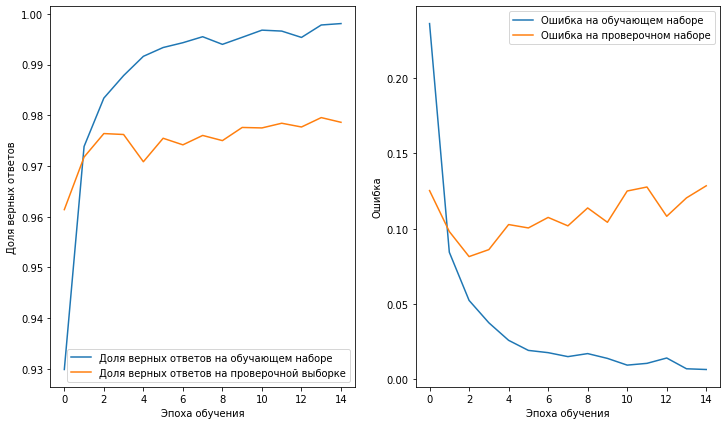

Обучение сети на обучающей выборке в 50.0%
(30000, 784) (30000, 10)
Epoch 1/15
188/188 [==============================] - 3s 18ms/step - loss: 0.3151 - accuracy: 0.9062 - val_loss: 0.1801 - val_accuracy: 0.9485
Epoch 2/15
188/188 [==============================] - 3s 17ms/step - loss: 0.1131 - accuracy: 0.9663 - val_loss: 0.1346 - val_accuracy: 0.9617
Epoch 3/15
188/188 [==============================] - 3s 17ms/step - loss: 0.0665 - accuracy: 0.9799 - val_loss: 0.1199 - val_accuracy: 0.9660
Epoch 4/15
188/188 [==============================] - 3s 17ms/step - loss: 0.0408 - accuracy: 0.9871 - val_loss: 0.1377 - val_accuracy: 0.9632
Epoch 5/15
188/188 [==============================] - 3s 18ms/step - loss: 0.0309 - accuracy: 0.9902 - val_loss: 0.1199 - val_accuracy: 0.9685
Epoch 6/15
188/188 [==============================] - 3s 17ms/step - loss: 0.0168 - accuracy: 0.9948 - val_loss: 0.1361 - val_accuracy: 0.9663
Epoch 7/15
188/188 [==============================] - 3s 17ms/step - loss:

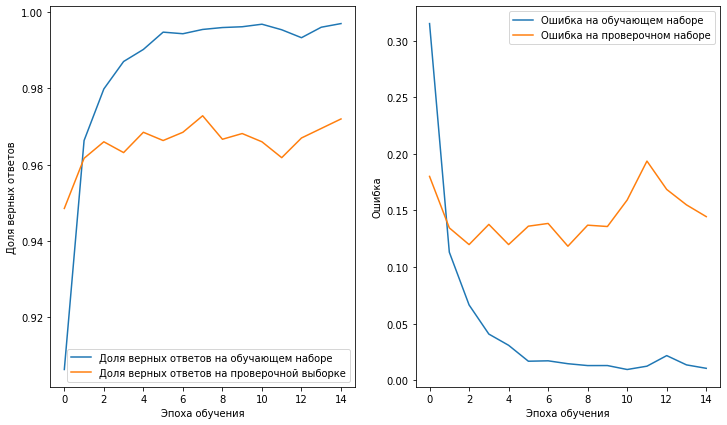

Обучение сети на обучающей выборке в 10.0%
(6000, 784) (6000, 10)
Epoch 1/15
38/38 [==============================] - 1s 20ms/step - loss: 0.7137 - accuracy: 0.7865 - val_loss: 0.3254 - val_accuracy: 0.9117
Epoch 2/15
38/38 [==============================] - 1s 17ms/step - loss: 0.2580 - accuracy: 0.9250 - val_loss: 0.2254 - val_accuracy: 0.9375
Epoch 3/15
38/38 [==============================] - 1s 17ms/step - loss: 0.1683 - accuracy: 0.9538 - val_loss: 0.2333 - val_accuracy: 0.9292
Epoch 4/15
38/38 [==============================] - 1s 17ms/step - loss: 0.1011 - accuracy: 0.9702 - val_loss: 0.1795 - val_accuracy: 0.9500
Epoch 5/15
38/38 [==============================] - 1s 18ms/step - loss: 0.0613 - accuracy: 0.9833 - val_loss: 0.1776 - val_accuracy: 0.9475
Epoch 6/15
38/38 [==============================] - 1s 17ms/step - loss: 0.0383 - accuracy: 0.9923 - val_loss: 0.1708 - val_accuracy: 0.9492
Epoch 7/15
38/38 [==============================] - 1s 17ms/step - loss: 0.0224 - accura

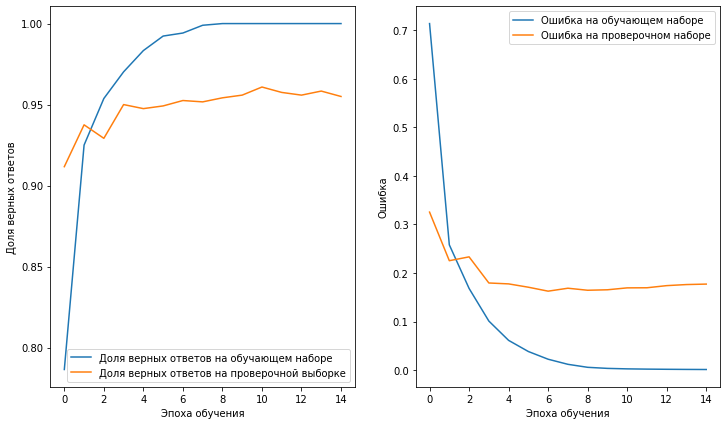

Обучение сети на обучающей выборке в 1.0%
(600, 784) (600, 10)
Epoch 1/15
4/4 [==============================] - 0s 44ms/step - loss: 1.9454 - accuracy: 0.3625 - val_loss: 1.3701 - val_accuracy: 0.6583
Epoch 2/15
4/4 [==============================] - 0s 16ms/step - loss: 0.9002 - accuracy: 0.8292 - val_loss: 0.8091 - val_accuracy: 0.7250
Epoch 3/15
4/4 [==============================] - 0s 18ms/step - loss: 0.4579 - accuracy: 0.8833 - val_loss: 0.6484 - val_accuracy: 0.7833
Epoch 4/15
4/4 [==============================] - 0s 16ms/step - loss: 0.2794 - accuracy: 0.9292 - val_loss: 0.6974 - val_accuracy: 0.7917
Epoch 5/15
4/4 [==============================] - 0s 16ms/step - loss: 0.1851 - accuracy: 0.9500 - val_loss: 0.6765 - val_accuracy: 0.8000
Epoch 6/15
4/4 [==============================] - 0s 16ms/step - loss: 0.1196 - accuracy: 0.9625 - val_loss: 0.6956 - val_accuracy: 0.7833
Epoch 7/15
4/4 [==============================] - 0s 16ms/step - loss: 0.0754 - accuracy: 0.9792 - val_

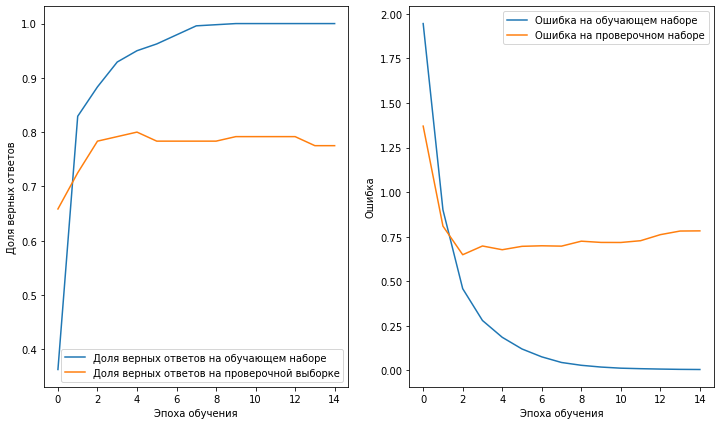

In [ ]:
for t_s in (0.1, 0.5, 0.9, 0.99):
    fitModel()

Вывод. 
С уменьшением обучающей выборки с одновременным увеличением проверочной, доля ошибок на проверочном наборе увеличивается. Также увеличивается доля ошибок на тестовых данных.